# Lets Grow More Internship December-2022


Done by Arnab Pal


Stock Market Prediction and Forecasting Using Stacked LSTM


Using Keras and Tensorflow

In [14]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [15]:
df = pd.read_csv('Reliance.csv')
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0


In [16]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1228,2020-11-10,2077.0,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
1229,2020-11-11,2089.0,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
1230,2020-11-12,1981.0,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0
1231,2020-11-13,1982.0,2036.650024,1981.750000,1996.400024,1996.400024,20946864.0
1232,2020-11-17,2085.0,2085.000000,1985.000000,1993.250000,1993.250000,21479385.0


In [17]:
df_close = df['Close']

In [18]:
df_close.shape

(1232,)

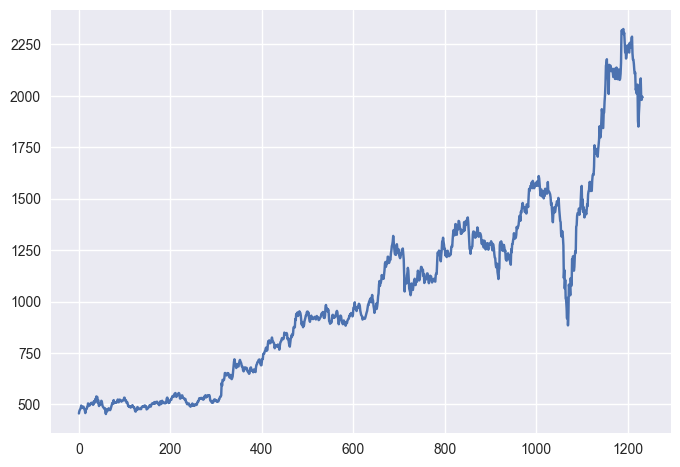

In [19]:
plt.plot(df_close)

In [20]:
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [21]:
df_close.shape

(1232, 1)

In [22]:
df_close

array([[0.00145623],
       [0.00753497],
       [0.01076806],
       ...,
       [0.81587418],
       [0.82463827],
       [0.82295492]])

In [24]:
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

In [25]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [26]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [27]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [28]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)


Epoch 1/100
13/13 [==============================] - 11s 274ms/step - loss: 0.0305 - val_loss: 0.0482
Epoch 2/100
13/13 [==============================] - 3s 199ms/step - loss: 0.0056 - val_loss: 0.0066
Epoch 3/100
13/13 [==============================] - 2s 191ms/step - loss: 0.0015 - val_loss: 0.0061
Epoch 4/100
13/13 [==============================] - 2s 190ms/step - loss: 8.2845e-04 - val_loss: 0.0061
Epoch 5/100
13/13 [==============================] - 2s 190ms/step - loss: 6.0113e-04 - val_loss: 0.0079
Epoch 6/100
13/13 [==============================] - 3s 196ms/step - loss: 5.5199e-04 - val_loss: 0.0073
Epoch 7/100
13/13 [==============================] - 3s 198ms/step - loss: 5.2339e-04 - val_loss: 0.0083
Epoch 8/100
13/13 [==============================] - 2s 191ms/step - loss: 5.6224e-04 - val_loss: 0.0098
Epoch 9/100
13/13 [==============================] - 3s 198ms/step - loss: 5.3550e-04 - val_loss: 0.0096
Epoch 10/100
13/13 [==============================] - 2s 191ms/ste

In [31]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [32]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [33]:
math.sqrt(mean_squared_error(y_train, train_predict))

932.7430545483975

In [34]:
math.sqrt(mean_squared_error(y_test, test_predict))

1709.0919959897458

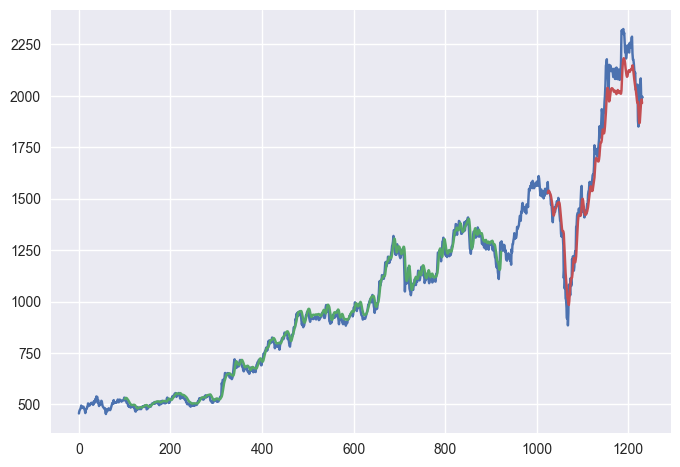

In [35]:
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data), x_test.shape

(308, (207, 100, 1))

In [37]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 101)

In [38]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [39]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.67861484 0.66843459 0.68633683 0.69849431 0.71321692 0.74736477
 0.73221462 0.7186143  0.73264216 0.76139264 0.79182641 0.7822073
 0.74319647 0.74287584 0.77937498 0.78375706 0.81135857 0.82869966
 0.85745014 0.90466386 0.91003455 0.92152404 0.8782113  0.88473103
 0.86242004 0.83137164 0.90704202 0.8941363  0.8982245  0.9048242
 0.89060937 0.89806416 0.89475093 0.89178502 0.88737626 0.87537912
 0.88991463 0.89686177 0.87842514 0.87030236 0.8777304  0.87043596
 0.89993454 0.88566622 0.88863201 0.86968773 0.87318804 0.89507149
 0.88646781 0.86784409 0.87072978 0.88379584 0.91278677 0.99436211
 0.99743488 0.98824331 0.99695397 1.         0.98621258 0.9899266
 0.96328709 0.93939953 0.94990047 0.92339443 0.93434952 0.942125
 0.9575156  0.9517976  0.94693455 0.93996067 0.93897212 0.96416879
 0.95441608 0.95131656 0.95324044 0.97656673 0.98020064 0.93691465
 0.92050875 0.92072245 0.90987421 0.89314775 0.8837156  0.88697546
 0.84211296 0.84499871 0.83268088 0.84093732 0.85568661

8 day output [[0.7109247]]
9 day input [0.76139264 0.79182641 0.7822073  0.74319647 0.74287584 0.77937498
 0.78375706 0.81135857 0.82869966 0.85745014 0.90466386 0.91003455
 0.92152404 0.8782113  0.88473103 0.86242004 0.83137164 0.90704202
 0.8941363  0.8982245  0.9048242  0.89060937 0.89806416 0.89475093
 0.89178502 0.88737626 0.87537912 0.88991463 0.89686177 0.87842514
 0.87030236 0.8777304  0.87043596 0.89993454 0.88566622 0.88863201
 0.86968773 0.87318804 0.89507149 0.88646781 0.86784409 0.87072978
 0.88379584 0.91278677 0.99436211 0.99743488 0.98824331 0.99695397
 1.         0.98621258 0.9899266  0.96328709 0.93939953 0.94990047
 0.92339443 0.93434952 0.942125   0.9575156  0.9517976  0.94693455
 0.93996067 0.93897212 0.96416879 0.95441608 0.95131656 0.95324044
 0.97656673 0.98020064 0.93691465 0.92050875 0.92072245 0.90987421
 0.89314775 0.8837156  0.88697546 0.84211296 0.84499871 0.83268088
 0.84093732 0.85568661 0.76107195 0.74661661 0.78017657 0.80251431
 0.84213971 0.85365588 

17 day output [[0.6714031]]
18 day input [0.85745014 0.90466386 0.91003455 0.92152404 0.8782113  0.88473103
 0.86242004 0.83137164 0.90704202 0.8941363  0.8982245  0.9048242
 0.89060937 0.89806416 0.89475093 0.89178502 0.88737626 0.87537912
 0.88991463 0.89686177 0.87842514 0.87030236 0.8777304  0.87043596
 0.89993454 0.88566622 0.88863201 0.86968773 0.87318804 0.89507149
 0.88646781 0.86784409 0.87072978 0.88379584 0.91278677 0.99436211
 0.99743488 0.98824331 0.99695397 1.         0.98621258 0.9899266
 0.96328709 0.93939953 0.94990047 0.92339443 0.93434952 0.942125
 0.9575156  0.9517976  0.94693455 0.93996067 0.93897212 0.96416879
 0.95441608 0.95131656 0.95324044 0.97656673 0.98020064 0.93691465
 0.92050875 0.92072245 0.90987421 0.89314775 0.8837156  0.88697546
 0.84211296 0.84499871 0.83268088 0.84093732 0.85568661 0.76107195
 0.74661661 0.78017657 0.80251431 0.84213971 0.85365588 0.8717452
 0.82506575 0.81587418 0.82463827 0.82295492 0.79051095 0.77970284
 0.7672407  0.75493979 0.7

26 day output [[0.63852334]]
27 day input [0.8941363  0.8982245  0.9048242  0.89060937 0.89806416 0.89475093
 0.89178502 0.88737626 0.87537912 0.88991463 0.89686177 0.87842514
 0.87030236 0.8777304  0.87043596 0.89993454 0.88566622 0.88863201
 0.86968773 0.87318804 0.89507149 0.88646781 0.86784409 0.87072978
 0.88379584 0.91278677 0.99436211 0.99743488 0.98824331 0.99695397
 1.         0.98621258 0.9899266  0.96328709 0.93939953 0.94990047
 0.92339443 0.93434952 0.942125   0.9575156  0.9517976  0.94693455
 0.93996067 0.93897212 0.96416879 0.95441608 0.95131656 0.95324044
 0.97656673 0.98020064 0.93691465 0.92050875 0.92072245 0.90987421
 0.89314775 0.8837156  0.88697546 0.84211296 0.84499871 0.83268088
 0.84093732 0.85568661 0.76107195 0.74661661 0.78017657 0.80251431
 0.84213971 0.85365588 0.8717452  0.82506575 0.81587418 0.82463827
 0.82295492 0.79051095 0.77970284 0.7672407  0.75493979 0.74367273
 0.73370415 0.72501493 0.71747756 0.71092469 0.70517802 0.70006329
 0.69541985 0.691107

In [40]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [41]:
df3 = df_close.tolist()
df3.extend(lst_output)
len(df_close)

1232